In [6]:
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category= Warning)

## EDA

In [7]:
#Importing data file
bikes = pd.read_csv(r'C:\Users\sunil pc\Jupyter_files\IIIT-B material\Linear Regression Assignment\Bike_data.csv')

In [8]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bikes.shape

(730, 16)

In [10]:
# Dropping variables instant, dteday from the dataframe since they are not suitable for analysis and inference.
# Dropping atemp variable since we already have temp variable for temperature.
# Dropping the casual and registered becuase the target variable cnt is an addition of them both.

bikes.drop(['instant','dteday','atemp','casual','registered'], axis='columns',inplace=True)

In [11]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [12]:
# Checking datatypes of all columns, and null values
bikes.info()
# As we can see, there are no null values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [13]:
# Replacing the categorical column values with understandable names

bikes['season'].replace(to_replace=[1,2,3,4],
                        value=['spring','summer','fall','winter'],
                        inplace=True)
bikes['mnth'].replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12],
                      value=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],
                      inplace=True)
bikes['weekday'].replace(to_replace=[0,1,2,3,4,5,6],
                         value=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
                        inplace=True)
bikes['weathersit'].replace(to_replace=[1,2,3],
                            value=['clear','mist and cloudy','light snow and light rain'],
                           inplace=True)

In [14]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,mist and cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,mist and cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


Text(0.5, 1.0, 'cnt vs windspeed')

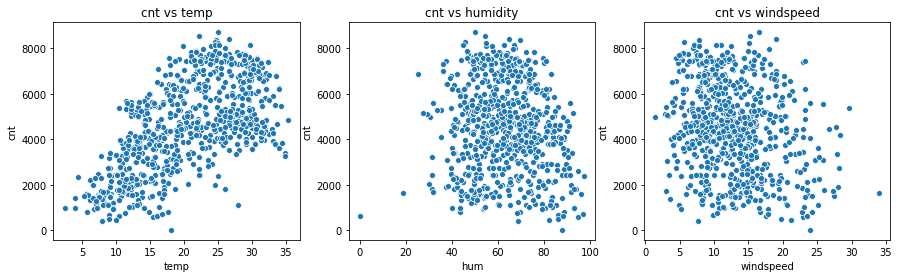

In [15]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.scatterplot(x=bikes['temp'], y=bikes['cnt'], data=bikes)
plt.title('cnt vs temp')

plt.subplot(1,3,2)
sns.scatterplot(x=bikes['hum'], y=bikes['cnt'], data=bikes)
plt.title('cnt vs humidity')

plt.subplot(1,3,3)
sns.scatterplot(x=bikes['windspeed'], y=bikes['cnt'], data=bikes)
plt.title('cnt vs windspeed')

We can see that temp has somewhat of a linear relationship with the target variable. Other two continuous variables are not linearlly distributed.

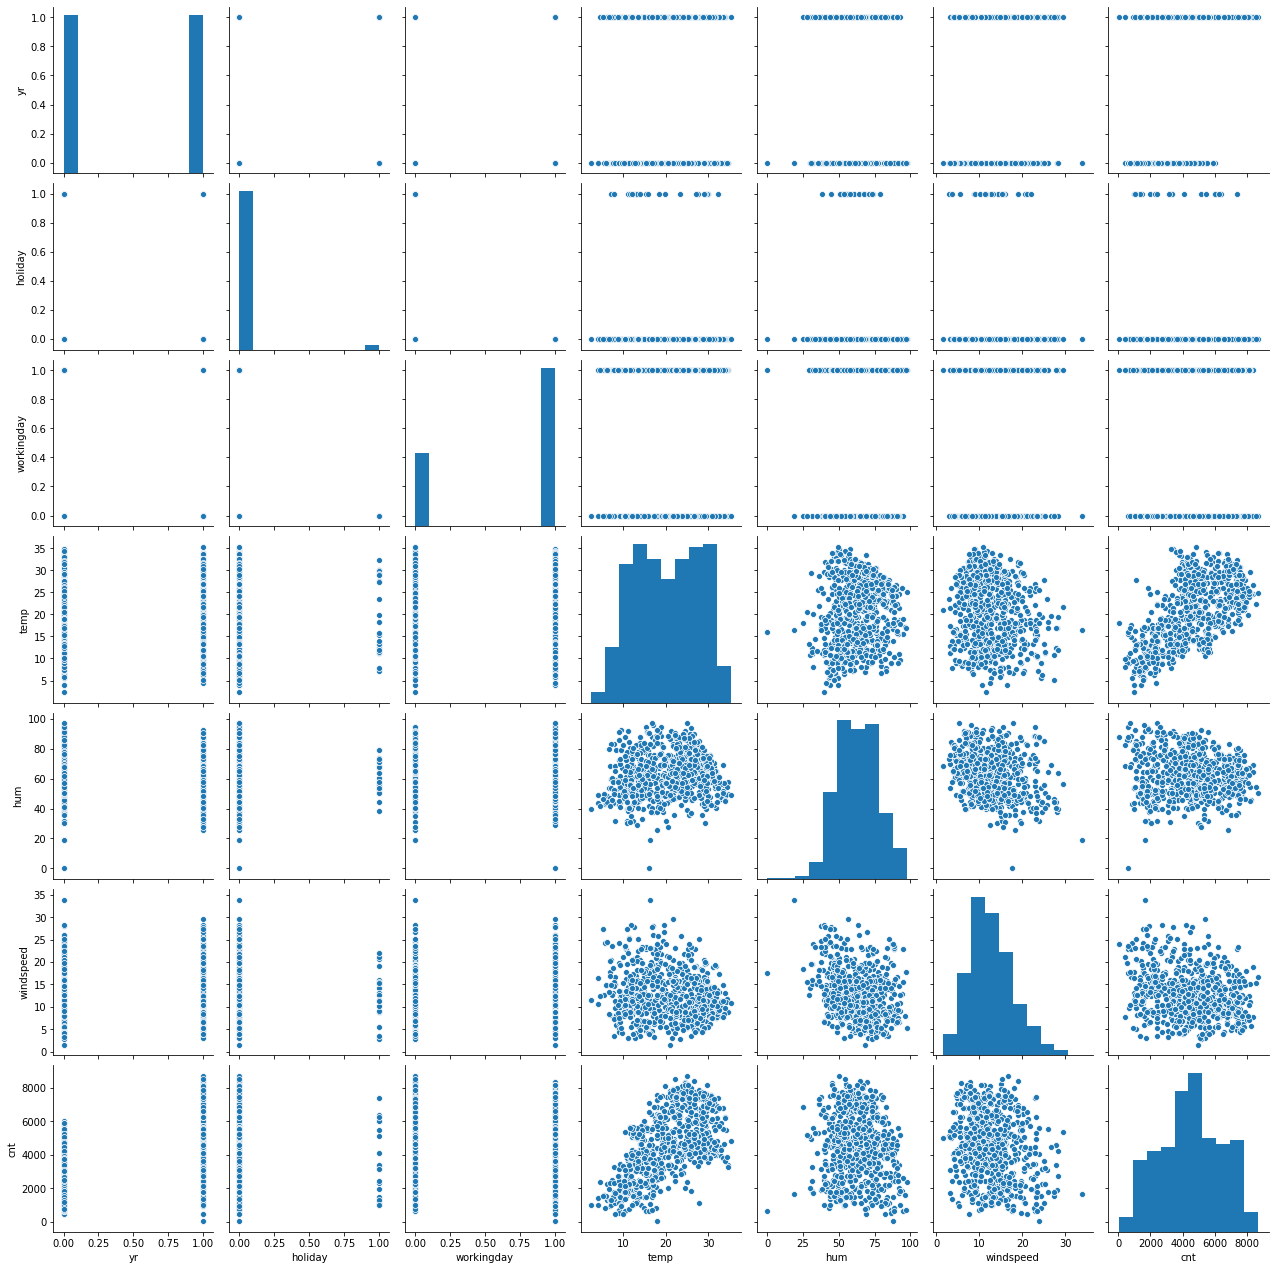

In [16]:
sns.pairplot(bikes)

From the above pairplots we can clearly see that the temp variable is highly correlated with the variables season and month. Target variable cnt is also correlated with month.

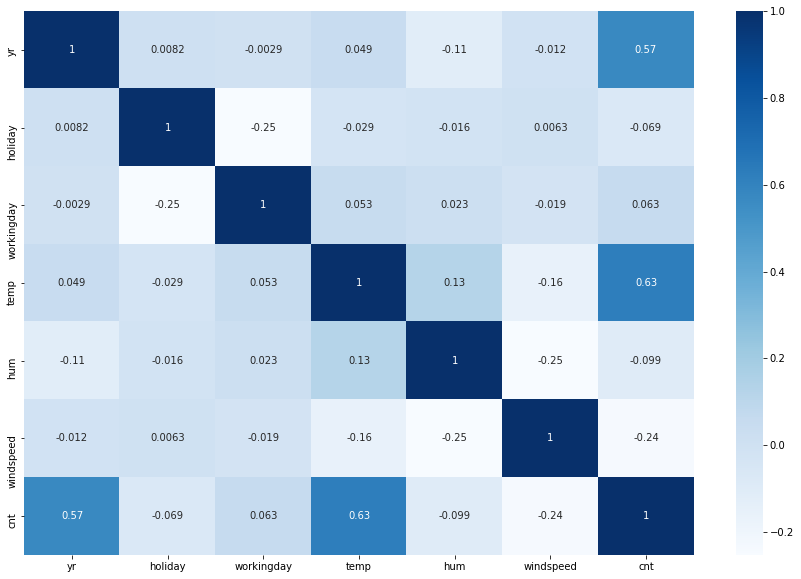

In [17]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(bikes.corr(), annot=True, cmap='Blues')
plt.show()

From the above heatmap we can clearly see that variables month and season are very highly correlated. Variables hum and weathersit are moderately correlated.

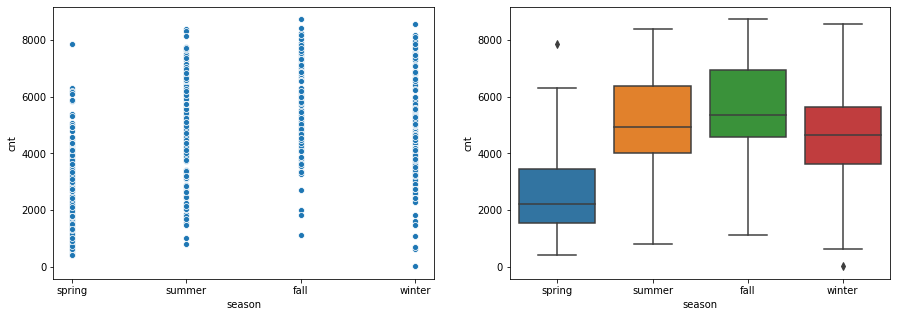

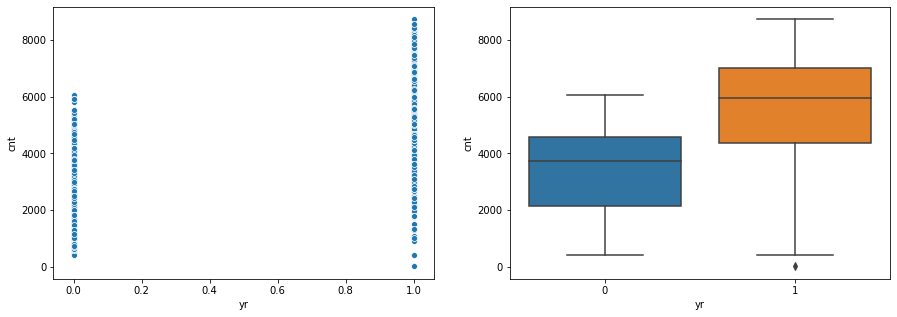

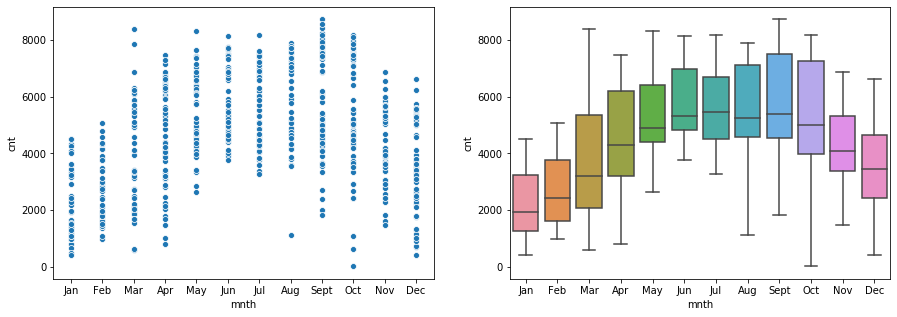

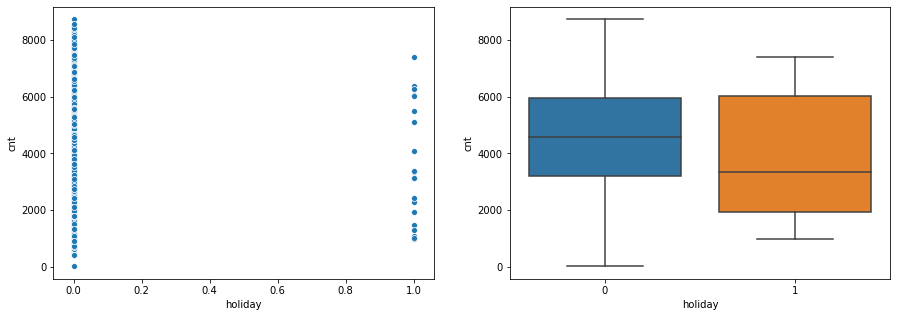

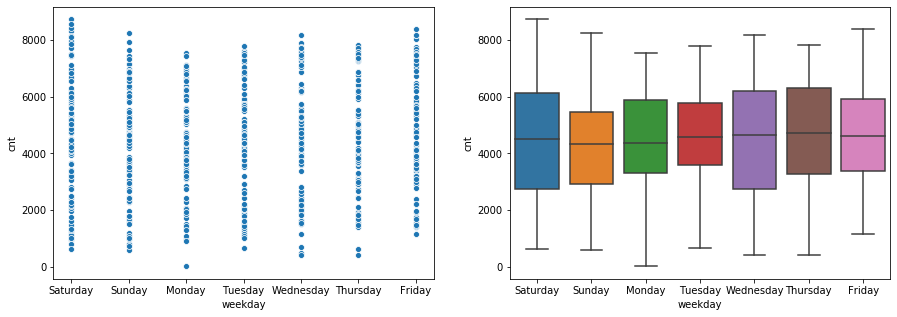

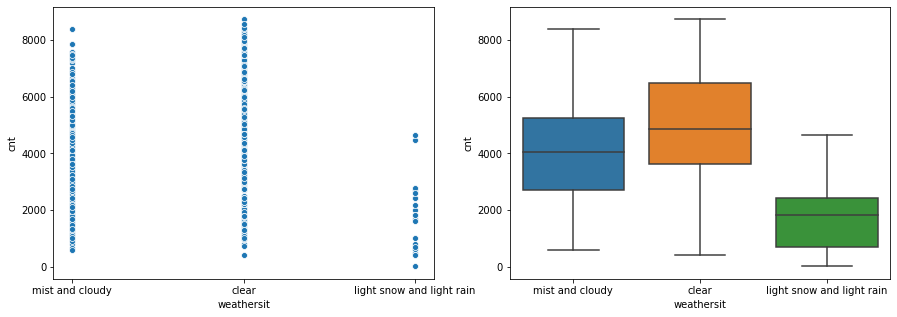

In [18]:
categorical_variables = bikes[['season', 'yr','mnth','holiday',
                                 'weekday','weathersit']]

for i in categorical_variables:
    plt.figure(figsize=(15,5))
    ax1= plt.subplot(1,2,1)
    ax2= plt.subplot(1,2,2)
    sns.scatterplot(x=i, y='cnt', data=bikes, ax=ax1)
    sns.boxplot(x=i, y='cnt', data=bikes, ax=ax2)

We can see that the weekday does not impact the variable cnt so much. Demand on all seven days of the week is almost the same. This trend is, however reversed for holidays. Lesser bikes are rented on holidays as compared to on working days.

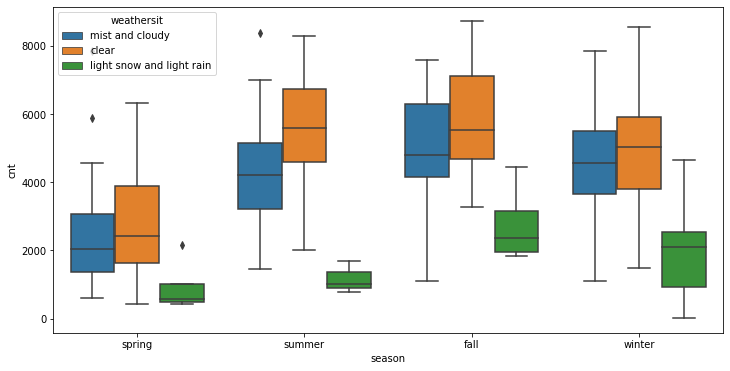

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='cnt', hue='weathersit', data=bikes)
plt.show()

We can see that in all seasons, the least number of bikes are rented when weather situation is snow and rainy. The most bikes are rented in summer and fall on clear days.

## Preparing the data for modelling

In [20]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,mist and cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,mist and cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


In [21]:
bikes_copy = bikes.copy()

#### Creating dummy variables

In [22]:
status = pd.get_dummies(data = bikes_copy, columns=['season','mnth','weekday','weathersit'], drop_first=True)
status.head()

# In season- fall is the one with all 0's
# In mnth- Apr is the one with all 0's
# In weekday- Friday is the one with all 0's
# In weathersit- clear is the one with all 0's

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow and light rain,weathersit_mist and cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
bikes_copy = status

In [24]:
bikes_copy.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow and light rain,weathersit_mist and cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
bikes_copy.shape

(730, 29)

#### Splitting data into train and test data

In [26]:
# Importing the required packages
import sklearn
from sklearn.model_selection import train_test_split

# Splitting the data
df_train, df_test = train_test_split(bikes_copy, train_size=0.7, test_size=0.3, random_state=98)

print(df_train.shape, df_test.shape)

(510, 29) (219, 29)


In [27]:
# Scaling the train data, because the range of many of our columns is 0-1, for rest of them it is approx 10-2000.
# Importing MinMax scaler

from sklearn.preprocessing import MinMaxScaler

# Creating the scaler object
scaler = MinMaxScaler()

In [28]:
# Creating a list of the numerical continuous variables in the data to scale them, since rest variables are already 0-1 range

num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow and light rain,weathersit_mist and cloudy
526,1,0,1,0.824514,0.447967,0.442114,0.764151,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
533,1,0,1,0.634491,0.720694,0.363465,0.584100,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
710,1,0,1,0.297020,0.376794,0.335293,0.609411,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
591,1,0,1,0.806862,0.493421,0.351597,0.842729,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
267,0,0,0,0.716524,0.816986,0.066769,0.573861,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow and light rain,weathersit_mist and cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.517647,0.025490,0.692157,0.543403,0.507784,0.404547,0.510138,0.264706,0.233333,0.231373,0.084314,0.096078,0.082353,0.084314,0.096078,0.082353,0.088235,0.072549,0.070588,0.086275,0.078431,0.152941,0.131373,0.150980,0.143137,0.143137,0.139216,0.031373,0.354902
std,0.500179,0.157763,0.462054,0.232725,0.201424,0.188318,0.225421,0.441610,0.423368,0.422124,0.278131,0.294988,0.275172,0.278131,0.294988,0.275172,0.283915,0.259649,0.256387,0.281045,0.269113,0.360284,0.338139,0.358381,0.350557,0.350557,0.346511,0.174494,0.478953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.338555,0.348834,0.268526,0.334791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.532731,0.501496,0.381289,0.510469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.748454,0.656998,0.508504,0.676542,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, all data is now converted between a range of 0-1. Max value of all variables is 1 and min is 0.

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

In [32]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow and light rain,weathersit_mist and cloudy
526,1,0,1,0.824514,0.447967,0.442114,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
533,1,0,1,0.634491,0.720694,0.363465,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
710,1,0,1,0.297020,0.376794,0.335293,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
591,1,0,1,0.806862,0.493421,0.351597,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
267,0,0,0,0.716524,0.816986,0.066769,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


## Checking Variance Inflation Factor between varibles

In [33]:
# Importing the package

from statsmodels.stats.outliers_influence import variance_inflation_factor

# help(variance_inflation_factor)

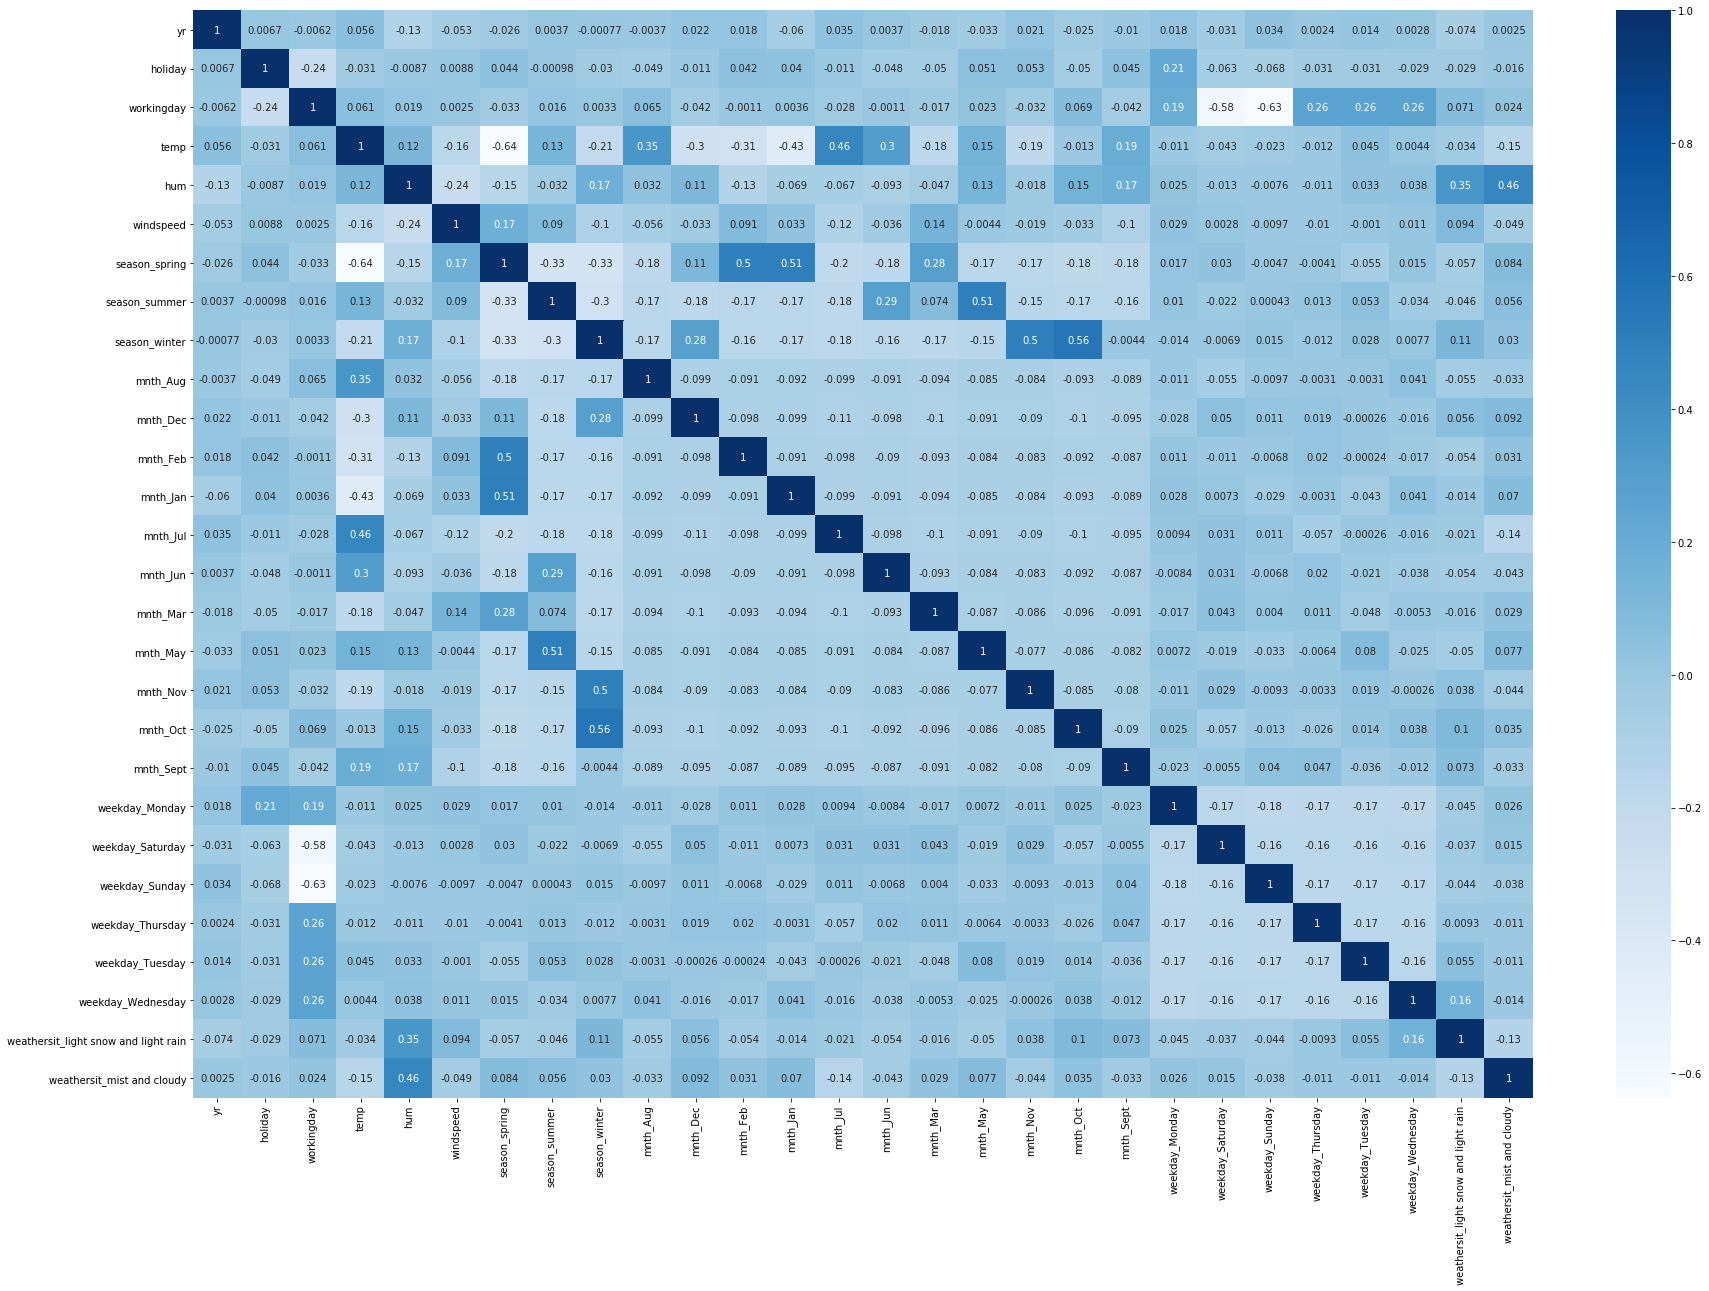

In [34]:
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(), annot=True, cmap='Blues')

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(exog = X_train.values, exog_idx= i) for i in range(0, X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=True)
vif

,Features,VIF
0,yr,1.07
5,windspeed,1.22
26,weathersit_light snow and light rain,1.51
27,weathersit_mist and cloudy,1.69
23,weekday_Thursday,1.77
25,weekday_Wednesday,1.78
24,weekday_Tuesday,1.79
20,weekday_Monday,1.84
16,mnth_May,2.06
4,hum,2.32


## Training the Model

Using Recursive Feature Elimination (RFE) approach.

In [36]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)     # Running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
# Listing all the columns of the X_train dataframe with info of whether they are included, and what is their ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 6),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 9),
 ('mnth_Sept', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 3),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 14),
 ('weekday_Wednesday', False, 13),
 ('weathersit_light snow and light rain', True, 1),
 ('weathersit_mist and cloudy', True, 1)]

In [39]:
# Listing all the columns that have been included in the model by RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_light snow and light rain',
       'weathersit_mist and cloudy'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train[col]

In [42]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_sm1 = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train,X_train_sm1).fit()   # Running the linear model

In [43]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          2.72e-187
Time:                        12:43:53   Log-Likelihood:                 508.28
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     494   BIC:                            -916.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.3610      0.028     12.694      0.000       0.305       0.417
yr                                       0.2324      0.008     28.254      0.000       0.216       0.249
holiday                                 -0.0930      0.026     -3.617      0.000      -0.144      -0.043
temp                                     0.3861      0.034     11.208      0.000       0.318       0.454
hum                                     -0.1258      0.029     -4.309      0.000      -0.183      -0.068
windspeed                               -0.1452      0.023     -6.218      0.000      -0.191      -0.099
season_spring                           -0.0968      0.018     -5.421      0.000      -0.132      -0.062
season_winter                            0.0823      0.014      5.799      0.000       0.054       0.110
mnth_Dec                                -0.0848      0.017     -4.869      0.000      -0.119      -0.051
mnth_Feb                                -0.0528      0.021     -2.564      0.011      -0.093      -0.012
mnth_Jan                                -0.0645      0.021     -3.014      0.003      -0.107      -0.022
mnth_Jul                                -0.0665      0.016     -4.085      0.000      -0.099      -0.035
mnth_Nov                                -0.0840      0.020     -4.198      0.000      -0.123      -0.045
mnth_Sept                                0.0609      0.016      3.821      0.000       0.030       0.092
weathersit_light snow and light rain    -0.2269      0.028     -8.220      0.000      -0.281      -0.173
weathersit_mist and cloudy              -0.0474      0.011     -4.379      0.000      -0.069      -0.026
==============================================================================
Omnibus:                       64.167   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.257
Skew:                          -0.703   Prob(JB):                     4.26e-30
Kurtosis:                       5.095   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif1 = pd.DataFrame()
vif1['Features'] = X_train_rfe1.columns
vif1['VIF'] = [variance_inflation_factor(exog = X_train_rfe1.values, exog_idx= i) for i in range(0, X_train_rfe1.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by='VIF', ascending=False)
vif1

,Features,VIF
3,hum,13.91
2,temp,12.60
4,windspeed,4.98
5,season_spring,4.47
6,season_winter,2.59
14,weathersit_mist and cloudy,2.56
9,mnth_Jan,2.17
0,yr,2.10
8,mnth_Feb,2.08
7,mnth_Dec,1.70


Removing the hum variable from the model since it has a very high VIF value

In [45]:
# X_train_rfe2 = pd.concat([X_train_rfe1, X_train['windspeed']], axis='columns')
X_train_rfe2 = X_train_rfe1.drop(['hum'], axis='columns')

In [46]:
import statsmodels.api as sm
X_train_sm2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train, X_train_sm2).fit()

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.72e-184
Time:                        12:43:54   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     495   BIC:                            -904.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.3190      0.027     11.734      0.000       0.266       0.372
yr                                       0.2384      0.008     28.900      0.000       0.222       0.255
holiday                                 -0.0965      0.026     -3.688      0.000      -0.148      -0.045
temp                                     0.3492      0.034     10.285      0.000       0.282       0.416
windspeed                               -0.1171      0.023     -5.134      0.000      -0.162      -0.072
season_spring                           -0.1044      0.018     -5.774      0.000      -0.140      -0.069
season_winter                            0.0723      0.014      5.073      0.000       0.044       0.100
mnth_Dec                                -0.0904      0.018     -5.112      0.000      -0.125      -0.056
mnth_Feb                                -0.0495      0.021     -2.362      0.019      -0.091      -0.008
mnth_Jan                                -0.0652      0.022     -2.995      0.003      -0.108      -0.022
mnth_Jul                                -0.0586      0.016     -3.560      0.000      -0.091      -0.026
mnth_Nov                                -0.0833      0.020     -4.091      0.000      -0.123      -0.043
mnth_Sept                                0.0525      0.016      3.258      0.001       0.021       0.084
weathersit_light snow and light rain    -0.2873      0.024    -11.879      0.000      -0.335      -0.240
weathersit_mist and cloudy              -0.0752      0.009     -8.511      0.000      -0.093      -0.058
==============================================================================
Omnibus:                       61.736   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.048
Skew:                          -0.693   Prob(JB):                     7.02e-28
Kurtosis:                       4.992   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif1 = pd.DataFrame()
vif1['Features'] = X_train_rfe2.columns
vif1['VIF'] = [variance_inflation_factor(exog = X_train_rfe2.values, exog_idx= i) for i in range(0, X_train_rfe2.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by='VIF', ascending=False)
vif1

,Features,VIF
2,temp,5.55
3,windspeed,4.90
4,season_spring,4.16
5,season_winter,2.35
8,mnth_Jan,2.13
7,mnth_Feb,2.08
0,yr,2.07
6,mnth_Dec,1.65
10,mnth_Nov,1.65
13,weathersit_mist and cloudy,1.59


Removing the mnth_Jan variable from the model since it has the least coefficient among all variables.

In [49]:
# X_train_rfe3 = pd.concat([X_train_rfe2, X_train['mnth_Jan']], axis='columns')
X_train_rfe3 = X_train_rfe2.drop('mnth_Jan', axis='columns')
X_train_sm3 = sm.add_constant(X_train_rfe3)
lm = sm.OLS(y_train, X_train_sm3).fit()

In [50]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.5
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.02e-183
Time:                        12:43:54   Log-Likelihood:                 494.29
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     496   BIC:                            -901.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.2923      0.026     11.291      0.000       0.241       0.343
yr                                       0.2388      0.008     28.714      0.000       0.222       0.255
holiday                                 -0.1002      0.026     -3.805      0.000      -0.152      -0.048
temp                                     0.3838      0.032     11.924      0.000       0.321       0.447
windspeed                               -0.1087      0.023     -4.764      0.000      -0.154      -0.064
season_spring                           -0.1262      0.017     -7.567      0.000      -0.159      -0.093
season_winter                            0.0718      0.014      4.996      0.000       0.044       0.100
mnth_Dec                                -0.0690      0.016     -4.232      0.000      -0.101      -0.037
mnth_Feb                                -0.0152      0.018     -0.858      0.391      -0.050       0.020
mnth_Jul                                -0.0649      0.016     -3.943      0.000      -0.097      -0.033
mnth_Nov                                -0.0722      0.020     -3.579      0.000      -0.112      -0.033
mnth_Sept                                0.0526      0.016      3.242      0.001       0.021       0.085
weathersit_light snow and light rain    -0.2882      0.024    -11.824      0.000      -0.336      -0.240
weathersit_mist and cloudy              -0.0756      0.009     -8.489      0.000      -0.093      -0.058
==============================================================================
Omnibus:                       56.690   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.026
Skew:                          -0.635   Prob(JB):                     3.87e-26
Kurtosis:                       4.973   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif1 = pd.DataFrame()
vif1['Features'] = X_train_rfe3.columns
vif1['VIF'] = [variance_inflation_factor(exog = X_train_rfe3.values, exog_idx= i) for i in range(0, X_train_rfe3.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by='VIF', ascending=True)
vif1

,Features,VIF
1,holiday,1.04
11,weathersit_light snow and light rain,1.09
10,mnth_Sept,1.21
6,mnth_Dec,1.46
8,mnth_Jul,1.49
7,mnth_Feb,1.51
12,weathersit_mist and cloudy,1.57
9,mnth_Nov,1.63
0,yr,2.07
5,season_winter,2.28


Removing mnth_Feb variable from the model because it is showing a very high p-value

In [52]:
# X_train_rfe4 = pd.concat([X_train_rfe3, X_train['weathersit_mist and cloudy']], axis='columns')
X_train_rfe4 = X_train_rfe3.drop('mnth_Feb',axis='columns')
X_train_sm4 = sm.add_constant(X_train_rfe4)
lm = sm.OLS(y_train, X_train_sm4).fit()

In [53]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          9.96e-185
Time:                        12:43:55   Log-Likelihood:                 493.91
No. Observations:                 510   AIC:                            -961.8
Df Residuals:                     497   BIC:                            -906.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.2920      0.026     11.284      0.000       0.241       0.343
yr                                       0.2385      0.008     28.711      0.000       0.222       0.255
holiday                                 -0.1008      0.026     -3.830      0.000      -0.153      -0.049
temp                                     0.3843      0.032     11.947      0.000       0.321       0.448
windspeed                               -0.1087      0.023     -4.765      0.000      -0.154      -0.064
season_spring                           -0.1311      0.016     -8.362      0.000      -0.162      -0.100
season_winter                            0.0709      0.014      4.948      0.000       0.043       0.099
mnth_Dec                                -0.0663      0.016     -4.145      0.000      -0.098      -0.035
mnth_Jul                                -0.0650      0.016     -3.947      0.000      -0.097      -0.033
mnth_Nov                                -0.0711      0.020     -3.532      0.000      -0.111      -0.032
mnth_Sept                                0.0528      0.016      3.256      0.001       0.021       0.085
weathersit_light snow and light rain    -0.2878      0.024    -11.811      0.000      -0.336      -0.240
weathersit_mist and cloudy              -0.0755      0.009     -8.484      0.000      -0.093      -0.058
==============================================================================
Omnibus:                       54.797   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.565
Skew:                          -0.612   Prob(JB):                     1.33e-25
Kurtosis:                       4.973   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif2 = pd.DataFrame()
vif2['Features'] = X_train_rfe4.columns
vif2['VIF'] = [variance_inflation_factor(exog = X_train_rfe4.values, exog_idx= i) for i in range(0, X_train_rfe4.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by='VIF', ascending=True)
vif2

,Features,VIF
1,holiday,1.04
10,weathersit_light snow and light rain,1.09
9,mnth_Sept,1.21
6,mnth_Dec,1.40
7,mnth_Jul,1.49
11,weathersit_mist and cloudy,1.57
8,mnth_Nov,1.62
4,season_spring,1.90
0,yr,2.07
5,season_winter,2.26


Removing mnth_Sept variable from the model since it has the least coefficient among all variables

In [55]:
# X_train_rfe5 = pd.concat([X_train_rfe4, X_train['season_winter']], axis='columns')
X_train_rfe5 = X_train_rfe4.drop(['mnth_Sept'], axis='columns')
X_train_sm5 = sm.add_constant(X_train_rfe5)
lm = sm.OLS(y_train, X_train_sm5).fit()

In [56]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.1
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.22e-183
Time:                        12:43:55   Log-Likelihood:                 488.53
No. Observations:                 510   AIC:                            -953.1
Df Residuals:                     498   BIC:                            -902.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.2943      0.026     11.269      0.000       0.243       0.346
yr                                       0.2382      0.008     28.403      0.000       0.222       0.255
holiday                                 -0.0953      0.027     -3.594      0.000      -0.147      -0.043
temp                                     0.3969      0.032     12.311      0.000       0.334       0.460
windspeed                               -0.1158      0.023     -5.051      0.000      -0.161      -0.071
season_spring                           -0.1332      0.016     -8.424      0.000      -0.164      -0.102
season_winter                            0.0720      0.014      4.982      0.000       0.044       0.100
mnth_Dec                                -0.0699      0.016     -4.340      0.000      -0.102      -0.038
mnth_Jul                                -0.0759      0.016     -4.663      0.000      -0.108      -0.044
mnth_Nov                                -0.0769      0.020     -3.798      0.000      -0.117      -0.037
weathersit_light snow and light rain    -0.2810      0.025    -11.465      0.000      -0.329      -0.233
weathersit_mist and cloudy              -0.0761      0.009     -8.473      0.000      -0.094      -0.058
==============================================================================
Omnibus:                       52.505   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.639
Skew:                          -0.592   Prob(JB):                     2.57e-24
Kurtosis:                       4.927   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif3 = pd.DataFrame()
vif3['Features'] = X_train_rfe5.columns
vif3['VIF'] = [variance_inflation_factor(exog = X_train_rfe5.values, exog_idx= i) for i in range(0, X_train_rfe5.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by='VIF', ascending=True)
vif3

,Features,VIF
1,holiday,1.04
9,weathersit_light snow and light rain,1.09
6,mnth_Dec,1.39
7,mnth_Jul,1.42
10,weathersit_mist and cloudy,1.57
8,mnth_Nov,1.61
4,season_spring,1.89
0,yr,2.07
5,season_winter,2.26
3,windspeed,4.85


Removing mnth_Dec variable from the model since it has least coefficient among all variables

In [58]:
# X_train_rfe6 = pd.concat([X_train_rfe5, X_train['mnth_Jan']], axis='columns')
X_train_rfe6 = X_train_rfe5.drop(['mnth_Dec'], axis='columns')
X_train_sm6 = sm.add_constant(X_train_rfe6)
lm = sm.OLS(y_train, X_train_sm6).fit()

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          7.75e-181
Time:                        12:43:56   Log-Likelihood:                 479.06
No. Observations:                 510   AIC:                            -936.1
Df Residuals:                     499   BIC:                            -889.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.2744      0.026     10.487      0.000       0.223       0.326
yr                                       0.2364      0.009     27.731      0.000       0.220       0.253
holiday                                 -0.0968      0.027     -3.586      0.000      -0.150      -0.044
temp                                     0.4258      0.032     13.260      0.000       0.363       0.489
windspeed                               -0.1112      0.023     -4.772      0.000      -0.157      -0.065
season_spring                           -0.1328      0.016     -8.252      0.000      -0.164      -0.101
season_winter                            0.0532      0.014      3.793      0.000       0.026       0.081
mnth_Jul                                -0.0814      0.017     -4.930      0.000      -0.114      -0.049
mnth_Nov                                -0.0493      0.020     -2.522      0.012      -0.088      -0.011
weathersit_light snow and light rain    -0.2841      0.025    -11.395      0.000      -0.333      -0.235
weathersit_mist and cloudy              -0.0774      0.009     -8.467      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       50.252   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.850
Skew:                          -0.596   Prob(JB):                     1.54e-21
Kurtosis:                       4.758   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif3 = pd.DataFrame()
vif3['Features'] = X_train_rfe6.columns
vif3['VIF'] = [variance_inflation_factor(exog = X_train_rfe6.values, exog_idx= i) for i in range(0, X_train_rfe6.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by='VIF', ascending=True)
vif3

,Features,VIF
1,holiday,1.03
8,weathersit_light snow and light rain,1.08
6,mnth_Jul,1.42
7,mnth_Nov,1.48
9,weathersit_mist and cloudy,1.56
4,season_spring,1.84
5,season_winter,1.85
0,yr,2.05
3,windspeed,4.84
2,temp,4.98


As we can see, our final train model has no significant multicorrelation, and it has an Adjusted R-squared of 82.4%. The p-values and VIF values are all in the acceptable range. So we will consider this as our final model and make predictions using it.

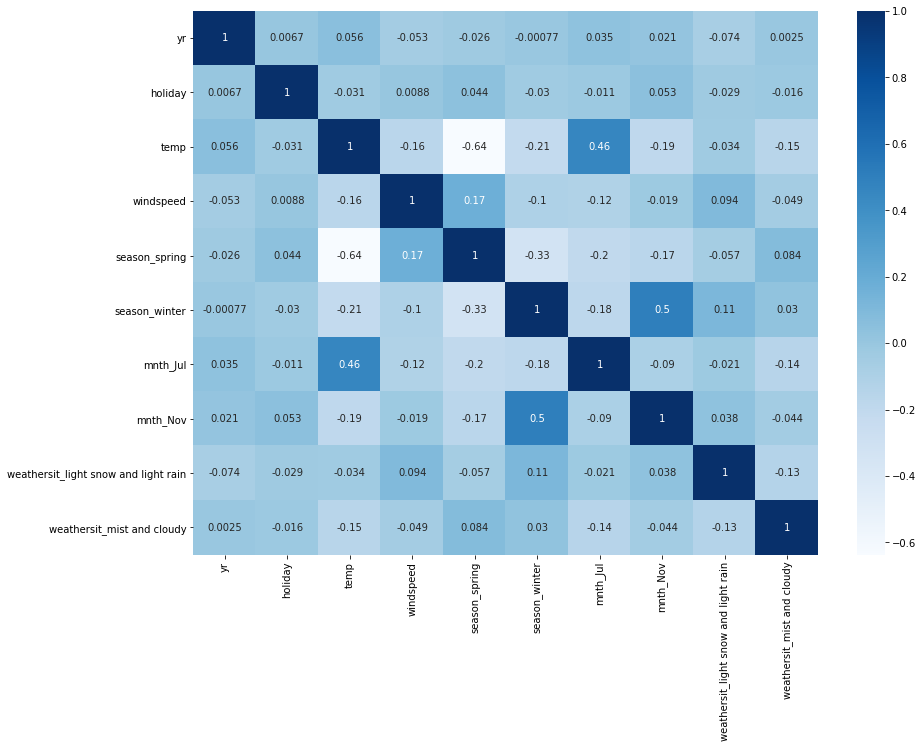

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(X_train_rfe6.corr(), annot=True, cmap='Blues')

## Residual Analysis of the error terms in train data

We will check if the error terms in our train data are normally distributed, and if they exhibit heteroscedasticity.

In [62]:
y_train.head()

526    0.764151
533    0.584100
710    0.609411
591    0.842729
267    0.573861
Name: cnt, dtype: float64

In [63]:
y_train_pred = lm.predict(X_train_sm6)
y_train_pred.head()

526    0.735258
533    0.663101
710    0.575777
591    0.815174
267    0.547909
dtype: float64

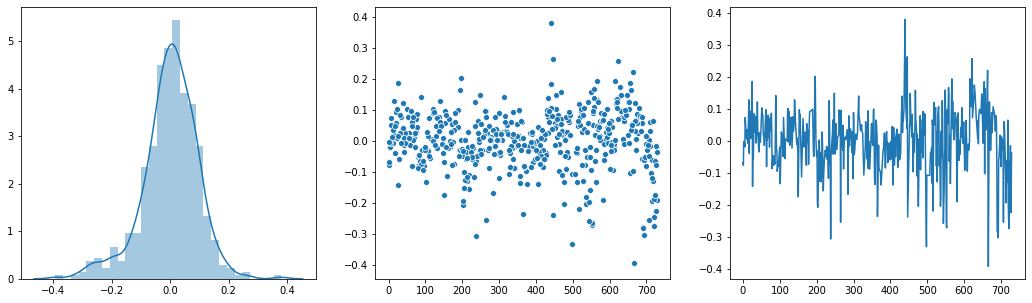

In [64]:
res = y_train - y_train_pred

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.distplot(res)

plt.subplot(1,3,2)
sns.scatterplot(data = res)

plt.subplot(1,3,3)
sns.lineplot(data = res)

From the above plots, we can see that the residuals of our model are normallly distributed. They are also distributed about a mean value of roughly 0, and follow no specific pattern as such. Thus, we conclude that the residuals are fitting all our assumptions about linear regression, and our model is acceptable.

## Evaluation and final predictions based on the model

In [65]:
# df_train, df_test = train_test_split(bikes_copy, train_size=0.7, test_size=0.3, random_state=98)

In [66]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_light snow and light rain', 'weathersit_mist and cloudy'],
      dtype='object')

In [67]:
num_vars = ['temp','hum','windspeed','cnt']

#Transforming the data now

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow and light rain,weathersit_mist and cloudy
56,0,0,0,0.278329,0.376197,0.391676,0.223999,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
624,1,0,1,0.650067,0.658493,0.308586,0.787736,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
158,0,0,1,0.893047,0.497009,0.272980,0.503797,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
176,0,0,0,0.773634,0.340909,0.172105,0.607800,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
268,0,0,1,0.735215,0.821770,0.210674,0.530143,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [68]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow and light rain,weathersit_mist and cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.456621,0.036530,0.662100,0.544722,0.498088,0.393361,0.528547,0.205479,0.292237,0.273973,0.086758,0.059361,0.063927,0.086758,0.059361,0.082192,0.077626,0.114155,0.109589,0.082192,0.091324,0.123288,0.173516,0.127854,0.141553,0.141553,0.146119,0.022831,0.296804
std,0.499256,0.188034,0.474078,0.218138,0.211729,0.177554,0.215746,0.404977,0.455833,0.447017,0.282125,0.236840,0.245183,0.282125,0.236840,0.275286,0.268194,0.318728,0.313092,0.275286,0.288730,0.329520,0.379560,0.334692,0.349389,0.349389,0.354034,0.149707,0.457896
min,0.000000,0.000000,0.000000,0.047675,-0.395932,0.047504,0.069144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352573,0.356160,0.267805,0.403992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.566998,0.502392,0.367929,0.526921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736253,0.645036,0.497361,0.695007,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.957426,0.910287,1.157215,0.981707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# Splitting the predictor and target variables

y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light snow and light rain,weathersit_mist and cloudy
56,1.0,0,0,0,0.278329,0.376197,0.391676,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
624,1.0,1,0,1,0.650067,0.658493,0.308586,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
158,1.0,0,0,1,0.893047,0.497009,0.272980,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
176,1.0,0,0,0,0.773634,0.340909,0.172105,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
268,1.0,0,0,1,0.735215,0.821770,0.210674,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [71]:
# Dropping all the variables that have not been included in the model from the X__test_sm dataset.

# X_test_sm.drop(['workingday','season_summer','mnth_Aug','mnth_Feb','mnth_Jul','mnth_Jun','mnth_Mar',
#                'mnth_May','mnth_Nov','mnth_Oct','mnth_Sept','weekday_Monday','weekday_Saturday','weekday_Sunday',
#                'weekday_Thursday','weekday_Tuesday','weekday_Wednesday','hum'], axis='columns' ,inplace=True)

X_test_sm.drop(['season_summer','mnth_Aug','mnth_Feb','mnth_Jun','mnth_Mar',''
               'mnth_May','mnth_Oct','weekday_Monday','weekday_Saturday','workingday',
               'weekday_Thursday','weekday_Tuesday','weekday_Wednesday','weekday_Sunday','mnth_Jan',
                'mnth_Dec','hum','mnth_Sept'], axis='columns',inplace=True)


# X_test_sm.drop('hum',axis='columns',inplace=True)
# X_test_sm = pd.concat([X_test_sm, X_test['season_winter']], axis='columns')

In [72]:
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Nov,weathersit_light snow and light rain,weathersit_mist and cloudy
56,1.0,0,0,0.278329,0.391676,1,0,0,0,0,0
624,1.0,1,0,0.650067,0.308586,0,0,0,0,0,1
158,1.0,0,0,0.893047,0.272980,0,0,0,0,0,0
176,1.0,0,0,0.773634,0.172105,0,0,0,0,0,0
268,1.0,0,0,0.735215,0.210674,0,1,0,0,0,1


In [73]:
# Making predictions

y_test_pred = lm.predict(X_test_sm)
y_test_pred.head()

56     0.216557
624    0.675838
158    0.624262
176    0.584641
268    0.539858
dtype: float64

In [74]:
y_test.head()

56     0.223999
624    0.787736
158    0.503797
176    0.607800
268    0.530143
Name: cnt, dtype: float64

## Model Evaluation

In [75]:
from sklearn.metrics import r2_score

r2_score(y_true= y_test, y_pred= y_test_pred)

0.822281937610964

Text(0, 0.5, 'y_pred')

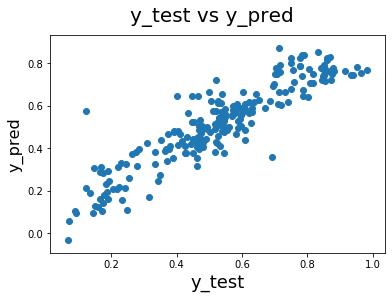

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

The model is a quite good fit on the test data. The r-squared value of the model on train data was 82.4%, on the test data it is 82.28%, which are very close to each other. This proves that our model is not overfitted or underfitted.